**Zillow-kaggle data competition And NYU ML Final Project**

[https://www.kaggle.com/c/zillow-prize-1](https://www.kaggle.com/c/zillow-prize-1)

**Team : CrusaderEmp**

* ** Can Xu :  cx461@nyu.edu**
* **Guanyu Zhu  : gz623@nyu.edu**


**Before we dive deep into the data, let us know a little more about the competition.**

**Zillow:**

[**Zillow**](https://www.zillow.com/) is an online real estate database company founded in 2006 - Wikipedia

**Zestimate:**

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today)

**Objective:**

Building a model to improve the Zestimate residual error.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

properties_2016.csv
properties_2017.csv
sample_submission.csv
train_2016_v2.csv
train_2017.csv
zillow_data_dictionary.xlsx



In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gc
import pandas as pd
import xgboost as xgb

import seaborn as sns

print("import all module ...")

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import all module ...


In [3]:
print('Loading data ...')

train = pd.read_csv('../input/train_2016_v2.csv', parse_dates=["transactiondate"])
prop = pd.read_csv('../input/properties_2016.csv')
sample = pd.read_csv('../input/sample_submission.csv')

Loading data ...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Show what's the input like **

In [4]:
print('Binding to float32')

for c, dtype in zip(prop.columns, prop.dtypes):
    if dtype == np.float64:
        prop[c] = prop[c].astype(np.float32)
print(train.shape)
train.head()

Binding to float32
(90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
train.tail(3)

,parcelid,logerror,transactiondate
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [6]:
print(prop.shape)
prop.head()

(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144440.0,-118654080.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,60378004.0,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140432.0,-118625360.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,60378000.0,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989360.0,-118394632.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,60377032.0,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.369141,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148864.0,-118437208.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,60371412.0,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.570312,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,60371232.0,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.169922,NaN,NaN,NaN


In [7]:
prop.tail(3)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(sample.shape)
sample.head()

(2985217, 7)


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [9]:
sample.tail(3)

,ParcelId,201610,201611,201612,201710,201711,201712
2985214,168040630,0,0,0,0,0,0
2985215,168040830,0,0,0,0,0,0
2985216,168040430,0,0,0,0,0,0


**Y** is target label ( logerror )

**X** need to elimate non-numeric type

In [10]:
print('Creating training set ...')

df_train = train.merge(prop, how='left', on='parcelid')

x_train = df_train.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode'], axis=1)
y_train = df_train['logerror'].values

Creating training set ...


**Logerror:**

Target variable for this competition is "logerror" field. So let us do some analysis on this field first.

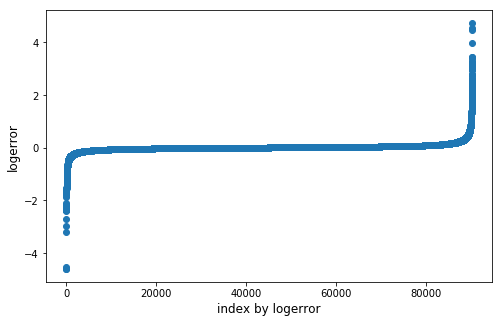

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(range(y_train.shape[0]), np.sort(y_train))
plt.xlabel('index by logerror', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

**Split all Training Data into Train and Test data for Cross-Validation**

In [12]:
print(x_train.shape, y_train.shape)

train_columns = x_train.columns

for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)

del df_train; gc.collect()

split = 80000
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]

(90275, 55) (90275,)


Use **XGBOOST** to train, since it is more powerful than sklearn in competition

In [13]:
print('Building DMatrix...')

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

del x_train, x_valid; gc.collect()

Building DMatrix...


0

** Metrics : Mae not RMSE , since ZillowMae Score **

** ETA (learning rate) = 0.04 **

**  subsample and colsample_bytree to decrease over-fitting**

**Those all were based on CV gird-search**

In [14]:
print('Training ...')


xgb_params = {
    'eval_metric':'mae',   # mae since ZillowMae Score , rmse as default
    'eta':0.04,             # learning rate by grid search
    'max_depth': 6,         # max depth of decision tree
    'subsample': 0.7,           # decrease over-fitting
    'colsample_bytree': 0.7,    # decrease over-fitting
    'objective': 'reg:linear',  # linear regression 
    'silent': 1,  # on 
    'seed' : 0,   # random seed 
    'alpha' : 0.2  # L1 Lasso
}


watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(xgb_params, d_train, 10000, watchlist, early_stopping_rounds=100, verbose_eval=10)



Training ...
[0]	train-mae:0.47845	valid-mae:0.471523
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[10]	train-mae:0.32512	valid-mae:0.318413
[20]	train-mae:0.225484	valid-mae:0.219383
[30]	train-mae:0.161778	valid-mae:0.156435
[40]	train-mae:0.121757	valid-mae:0.117174
[50]	train-mae:0.097541	valid-mae:0.093566
[60]	train-mae:0.083534	valid-mae:0.080256
[70]	train-mae:0.075857	valid-mae:0.073253
[80]	train-mae:0.071808	valid-mae:0.069696
[90]	train-mae:0.069694	valid-mae:0.068107
[100]	train-mae:0.068533	valid-mae:0.067364
[110]	train-mae:0.067866	valid-mae:0.067025
[120]	train-mae:0.06748	valid-mae:0.066888
[130]	train-mae:0.067235	valid-mae:0.066829
[140]	train-mae:0.067073	valid-mae:0.066821
[150]	train-mae:0.066954	valid-mae:0.066841
[160]	train-mae:0.06686	valid-mae:0.066918
[170]	train-mae:0.066751	valid-mae:0.06697
[180]	train-mae:0.066671	valid-mae:0.06698
[190]	train-mae:0.066598

**Show the importance of different feature**

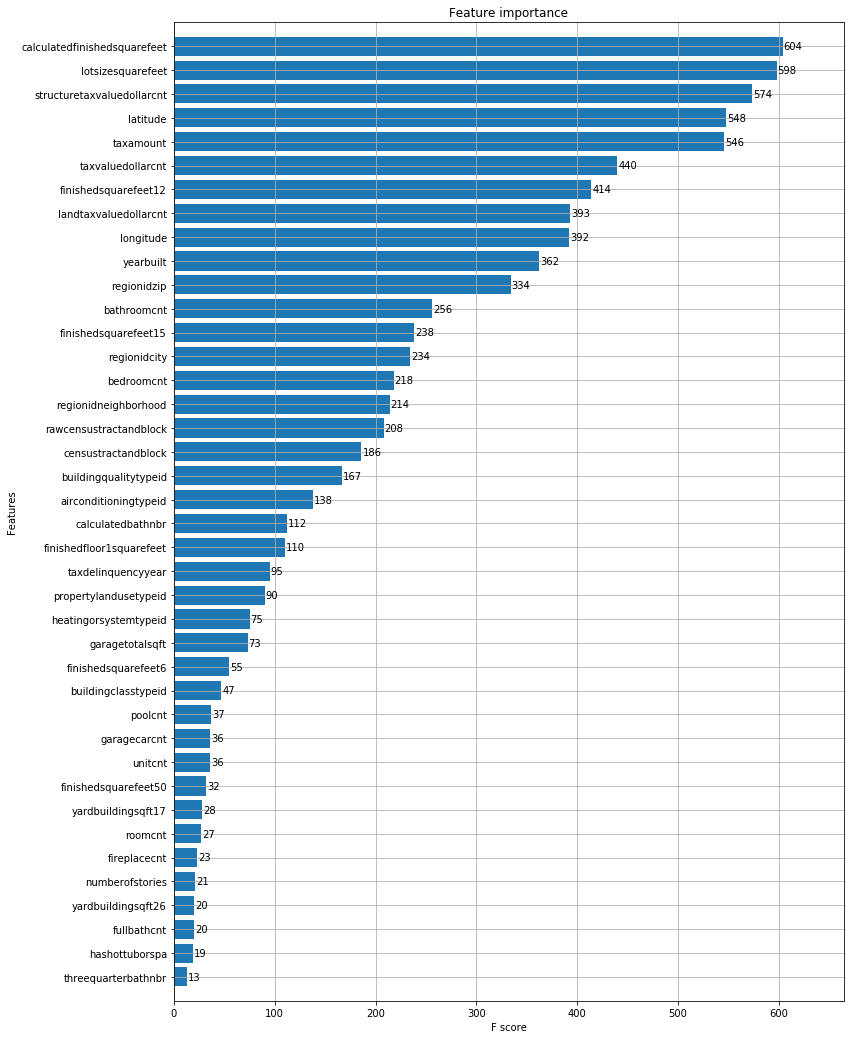

In [15]:
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=40, height=0.8, ax=ax)
plt.show()

In [16]:
del d_train, d_valid

In [17]:
print('Building test set ...')

sample['parcelid'] = sample['ParcelId']
df_test = sample.merge(prop, on='parcelid', how='left')

del prop; gc.collect()

x_test = df_test[train_columns]
for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)

del df_test, sample; gc.collect()

d_test = xgb.DMatrix(x_test)

del x_test; gc.collect()


Building test set ...


7

In [18]:
print('Predicting on test ...')

p_test = clf.predict(d_test)

del d_test; gc.collect()



Predicting on test ...


0

In [19]:
sub = pd.read_csv('../input/sample_submission.csv')
for i,c in enumerate(sub.columns):
    if i > 0 :
        sub[c] = p_test
                
sub.head(6)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.333205,0.333205,0.333205,0.333205,0.333205,0.333205
1,10759547,-0.011841,-0.011841,-0.011841,-0.011841,-0.011841,-0.011841
2,10843547,0.211323,0.211323,0.211323,0.211323,0.211323,0.211323
3,10859147,0.429957,0.429957,0.429957,0.429957,0.429957,0.429957
4,10879947,0.243718,0.243718,0.243718,0.243718,0.243718,0.243718
5,10898347,0.124363,0.124363,0.124363,0.124363,0.124363,0.124363


In [20]:
sub.tail(3)

,ParcelId,201610,201611,201612,201710,201711,201712
2985214,168040630,0.535048,0.535048,0.535048,0.535048,0.535048,0.535048
2985215,168040830,0.535048,0.535048,0.535048,0.535048,0.535048,0.535048
2985216,168040430,0.535048,0.535048,0.535048,0.535048,0.535048,0.535048


In [21]:
import datetime

now = datetime.datetime.now()
print( now )

sub.to_csv('sub{0:s}.csv'.format(now.strftime('%Y%m%d_%H%M%S')), index=False, float_format='%.4f') 

print("Saved to sub{0:s}.csv".format( now.strftime('%Y%m%d_%H%M%S')) );

2017-12-16 03:32:53.998873
Saved to sub20171216_033253.csv
